## Part 1 (TensorFlow)

### Sungwon Lee
### 017473950

In [2]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1

In [5]:
column_name = []
for _ in range(1, 10):
    column_name.append("feature"+str(_))
    
dia_df = pd.read_csv("diabetes.csv", header=None, names=column_name)
print(dia_df.head())
print(dia_df.shape)

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  feature9  
0 -0.033333         0  
1 -0.666667         1  
2 -0.633333         0  
3  0.000000         1  
4 -0.600000         0  
(759, 9)


### Step 2

In [7]:
X = dia_df.iloc[:, :-1]  # Features
y = dia_df.iloc[:, -1]   # Labels

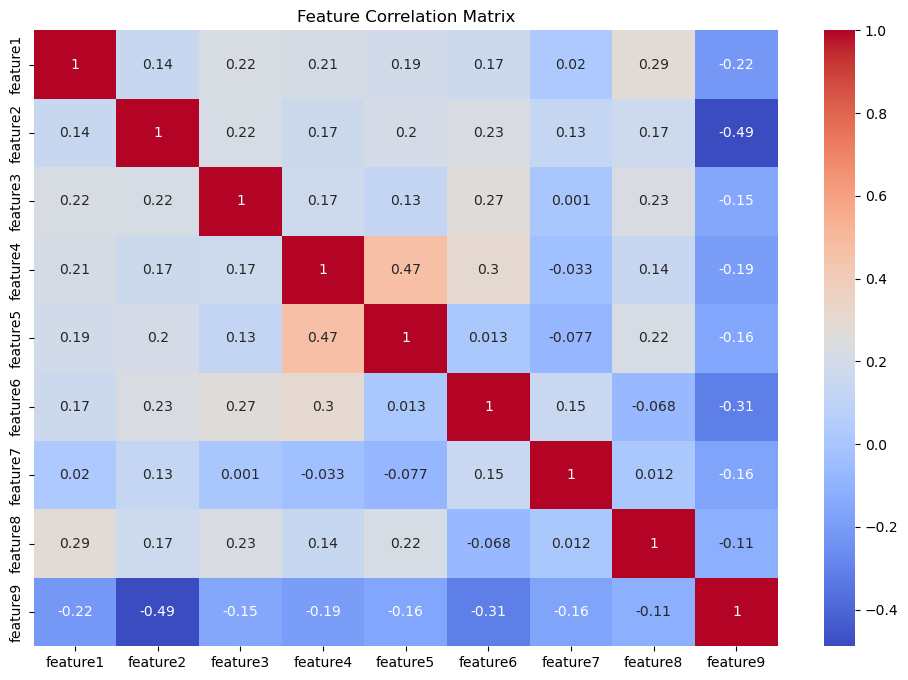

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(dia_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

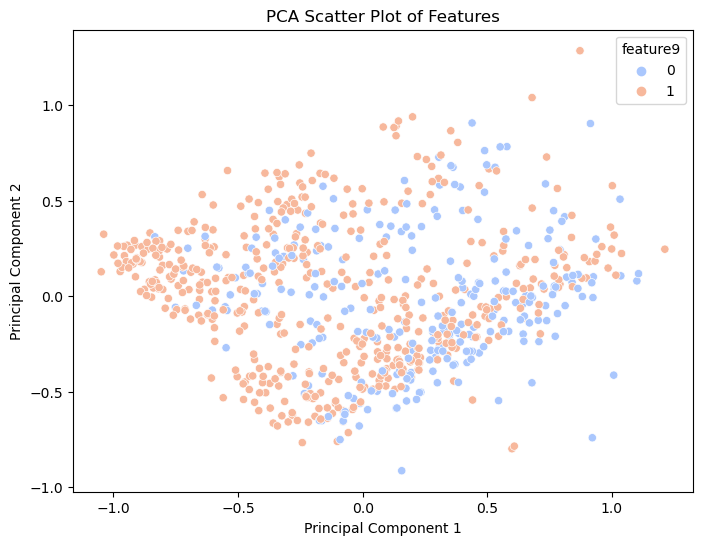

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')

plt.title('PCA Scatter Plot of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Step 3

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=255)

### Step 4

In [13]:
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

linear_model.compile(optimizer='SGD',
                     loss='mean_squared_error',
                     metrics=['accuracy'])

linear_model.fit(X_train, y_train, epochs=2)

Epoch 1/2
17/17 [==============================] - 0s 692us/step - loss: 0.4405 - accuracy: 0.4501
Epoch 2/2
17/17 [==============================] - 0s 512us/step - loss: 0.2900 - accuracy: 0.6008


In [14]:
y_pred = linear_model.predict(X_test)

8/8 [==============================] - 0s 629us/step


In [15]:
from sklearn.metrics import accuracy_score

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.55


In [16]:
linear_predict = linear_model.predict(X_test)
# linear_predict[:,0]

8/8 [==============================] - 0s 429us/step


Hypothesis
1. Increase the model complexity by adding more layers
2. Changing the optimizer from 'SGD' to 'Adam' might converge faster and improve results
3. Since the label of the data is binary class, change the loss to binary_crossentropy
3. Increase the size of the epoch to learn more thoroughly

In [18]:
new_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

new_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

new_model.fit(X_train, y_train, epochs=20)


Epoch 1/20
17/17 [==============================] - 0s 646us/step - loss: 0.7142 - accuracy: 0.3371
Epoch 2/20
17/17 [==============================] - 0s 630us/step - loss: 0.6866 - accuracy: 0.6234
Epoch 3/20
17/17 [==============================] - 0s 594us/step - loss: 0.6746 - accuracy: 0.7326
Epoch 4/20
17/17 [==============================] - 0s 575us/step - loss: 0.6568 - accuracy: 0.7533
Epoch 5/20
17/17 [==============================] - 0s 500us/step - loss: 0.6231 - accuracy: 0.7552
Epoch 6/20
17/17 [==============================] - 0s 500us/step - loss: 0.5830 - accuracy: 0.7589
Epoch 7/20
17/17 [==============================] - 0s 570us/step - loss: 0.5460 - accuracy: 0.7646
Epoch 8/20
17/17 [==============================] - 0s 531us/step - loss: 0.5116 - accuracy: 0.7759
Epoch 9/20
17/17 [==============================] - 0s 628us/step - loss: 0.4899 - accuracy: 0.7815
Epoch 10/20
17/17 [==============================] - 0s 565us/step - loss: 0.4736 - accuracy: 0.7797

In [19]:
y_pred_new = new_model.predict(X_test)

y_pred_new_binary = (y_pred_new > 0.5).astype(int)

new_accuracy = accuracy_score(y_test, y_pred_new_binary)
print(f"New Model Accuracy: {new_accuracy:.2f}")


8/8 [==============================] - 0s 571us/step
New Model Accuracy: 0.75


We can observe that the accuracy has improved about 0.15. The reason is that the new model has a deeper model with more appropriate optimizer such as adam. 

## Part 2 (PyTorch)

### Step 1

In [23]:
column_name = []
for _ in range(1, 10):
    column_name.append("feature"+str(_))
    
dia_df = pd.read_csv("diabetes.csv", header=None, names=column_name)
print(dia_df.head())
print(dia_df.shape)

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  feature9  
0 -0.033333         0  
1 -0.666667         1  
2 -0.633333         0  
3  0.000000         1  
4 -0.600000         0  
(759, 9)


### Step 2

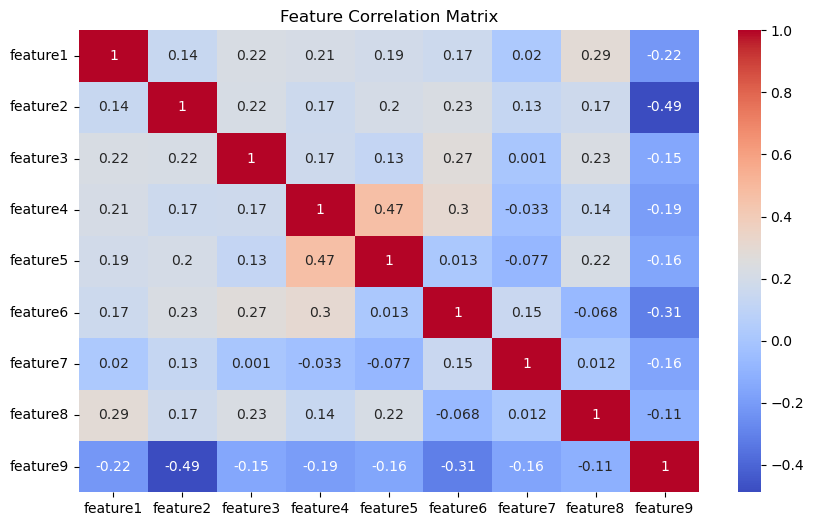

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(dia_df.iloc[:, :-1])  # Normalize the features
y = dia_df['feature9']  # Target variable

# Visualize the feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(dia_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Step 3

In [27]:
import numpy as np  
import torch

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=255)

input_tensor = torch.tensor(X_train, dtype=torch.float32)

output_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)  


### Step 4

In [29]:
import torch.nn as nn
import torch.optim as optim


linear_model = nn.Sequential(
    nn.Linear(input_tensor.shape[1], 1))

criterion = nn.MSELoss()
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)

### Step 5

In [31]:
epochs = 3
batch_size = 32
for epoch in range(epochs):
    permutation = torch.randperm(input_tensor.size()[0])
    total_loss = 0
    
    for i in range(0, input_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        X_batch = input_tensor[indices]
        y_batch = output_tensor[indices]
        
        optimizer.zero_grad()
        y_pred = linear_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

print('Finished Training')

Epoch 1, Loss: 16.8478
Epoch 2, Loss: 9.8819
Epoch 3, Loss: 6.4276
Finished Training


### Step 6

In [33]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

linear_model.eval()  
with torch.no_grad():
    y_pred_test = linear_model(X_test_tensor)


### Step 7

In [35]:
from sklearn.metrics import accuracy_score

y_pred_test_binary = (y_pred_test > 0.5).float().numpy()
accuracy = accuracy_score(y_test, y_pred_test_binary)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.59


### Step 8

Hypothesis
1. Add more layers may improve the model's learning capacity.
2. Switching from SGD to Adam optimizer for better convergence.
3. Also, change the learning late (smaller) and change the epoch size for better training.


### Step 9

In [39]:
import torch.nn as nn
import torch.optim as optim


modified_model = nn.Sequential(
    nn.Linear(input_tensor.shape[1], 16), 
    nn.ReLU(),                      
    nn.Linear(16, 8),               
    nn.ReLU(),                          
    nn.Linear(8, 1),                      
    nn.Sigmoid()                          
)

optimizer = optim.Adam(modified_model.parameters(), lr=0.001)

criterion = nn.BCELoss() 


epochs = 10  
batch_size = 32

for epoch in range(epochs):
    permutation = torch.randperm(input_tensor.size()[0])
    total_loss = 0
    
    for i in range(0, input_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        X_batch = input_tensor[indices]
        y_batch = output_tensor[indices]
        
        optimizer.zero_grad()
        y_pred = modified_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

print('Finished Training')


Epoch 1, Loss: 11.5706
Epoch 2, Loss: 11.3715
Epoch 3, Loss: 11.1696
Epoch 4, Loss: 10.9281
Epoch 5, Loss: 10.6003
Epoch 6, Loss: 10.1940
Epoch 7, Loss: 9.7572
Epoch 8, Loss: 9.4984
Epoch 9, Loss: 9.0829
Epoch 10, Loss: 8.7890
Finished Training


In [40]:
from sklearn.metrics import accuracy_score

y_pred_test_binary = (y_pred_test > 0.5).float().numpy()

accuracy = accuracy_score(y_test, y_pred_test_binary)
print(f'Accuracy of the modified model: {accuracy:.2f}')


Accuracy of the modified model: 0.59


However, these changes did not improve the accuracy. Thus, I decided to use dropout and RMSprop optimizer and test the model again to see if my hypothesis is right. 

In [42]:
import torch.nn as nn
import torch.optim as optim

class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(input_tensor.shape[1], 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.3)  
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x) 
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

deep_model = DeepModel()

optimizer = optim.RMSprop(deep_model.parameters(), lr=0.001)

criterion = nn.BCELoss()
epochs = 10  
batch_size = 32

for epoch in range(epochs):
    permutation = torch.randperm(input_tensor.size()[0])
    total_loss = 0
    
    for i in range(0, input_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        X_batch = input_tensor[indices]
        y_batch = output_tensor[indices]
        
        optimizer.zero_grad()
        y_pred = deep_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

print('Finished Training')
deep_model.eval() 
with torch.no_grad():
    y_pred_test = deep_model(X_test_tensor)


Epoch 1, Loss: 10.5057
Epoch 2, Loss: 9.8901
Epoch 3, Loss: 9.3860
Epoch 4, Loss: 8.8773
Epoch 5, Loss: 8.8306
Epoch 6, Loss: 8.5914
Epoch 7, Loss: 8.0913
Epoch 8, Loss: 8.0456
Epoch 9, Loss: 8.2227
Epoch 10, Loss: 8.0595
Finished Training


In [43]:
from sklearn.metrics import accuracy_score

y_pred_test_binary = (y_pred_test > 0.5).float().numpy()

accuracy = accuracy_score(y_test, y_pred_test_binary)
print(f'Accuracy of the modified model with Dropout and RMSprop: {accuracy:.2f}')


Accuracy of the modified model with Dropout and RMSprop: 0.75


As a conclusion, we could observe that the accuracy of the new model with RMSprop and Dropout techniques had better accuracy than the previous model.